In [256]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tools.dataframe_tools as dftool

# 设置绘图样式
plt.style.use(['science','no-latex'])


def get_result(type_con):
    start = 900
    end = 7200
    data_result = pd.DataFrame(columns=["beishu", "speed_all", "timeloss_all", "traveltime_all", "flow_all",
                                        "speed_p", "timeloss_p", "traveltime_p", "flow_p",
                                        "speed_t", "timeloss_t", "traveltime_t", "flow_t", ])

    types = ["passenger", "coach", "truck", "trailer"]
    vs = [120, 100, 90, 80]  # 限速
    index = 0
    l = 8500
    for bei in np.linspace(1.0, 2.0, 11):
        path_result = "data/result/" + str(numline) + "/"+"0_"+ str(int(bei * 10)) + "_"
        path = path_result + type_con + ".csv"
        data = dftool.df_load_csv(path)
        data = data.loc[(data["time_y"] >= start) & (data["time_y"] <= end)]
        for i in range(len(types)):
            data.loc[data["vclass_x"] == types[i], "vs"] = vs[i]
        data["timeloss"] = data["travel_time"] - l / data["vs"] * 3.6
        data["speed"] = l / data["travel_time"] * 3.6
        df_p = data.loc[(data["vclass_x"] == types[0]), :]
        df_t = data.loc[(data["vclass_x"] != types[0]), :]

        data_result.loc[index, "beishu"] = bei

        data_result.loc[index, "flow_p"] = sum(df_p["pcu"])
        data_result.loc[index, "traveltime_p"] = df_p["travel_time"].mean()
        data_result.loc[index, "speed_p"] = df_p["speed"].mean()
        data_result.loc[index, "timeloss_p"] = df_p["timeloss"].mean()

        data_result.loc[index, "flow_t"] = sum(df_t["pcu"])
        data_result.loc[index, "traveltime_t"] = sum(df_t["travel_time"] * df_t["pcu"]) / data_result.loc[
            index, "flow_t"]
        data_result.loc[index, "speed_t"] = sum(df_t["speed"] * df_t["pcu"]) / data_result.loc[index, "flow_t"]
        data_result.loc[index, "timeloss_t"] = sum(df_t["timeloss"] * df_t["pcu"]) / data_result.loc[index, "flow_t"]

        index += 1

    data_result["flow_all"] = data_result["flow_p"] + data_result["flow_t"]
    data_result["traveltime_all"] = (data_result["flow_p"] * data_result["traveltime_p"] + data_result["flow_t"] *
                                     data_result["traveltime_t"]) / data_result["flow_all"]
    data_result["timeloss_all"] = (data_result["flow_p"] * data_result["timeloss_p"] + data_result["flow_t"] *
                                   data_result["timeloss_t"]) / data_result["flow_all"]
    data_result["speed_all"] = (data_result["flow_p"] * data_result["speed_p"] + data_result["flow_t"] * data_result[
        "speed_t"]) / data_result["flow_all"]
    return data_result.copy()

In [257]:

numline = 4
data_mpc =get_result("mpc")

data_feedback = get_result("feedback")
data_no = get_result("no")
data_static = []
for i in range(numline):
    data_static.append(get_result("static_" + str(i)))

# data_mpc.to_excel("mpc.xlsx")
# data_feedback.to_excel("feedback.xlsx")
# for i in range(numline):
#     data_static[i].to_excel("static_" + str(i) +".xlsx")

开始画图

ValueError: subplot_tool can only be launched for figures with an associated toolbar

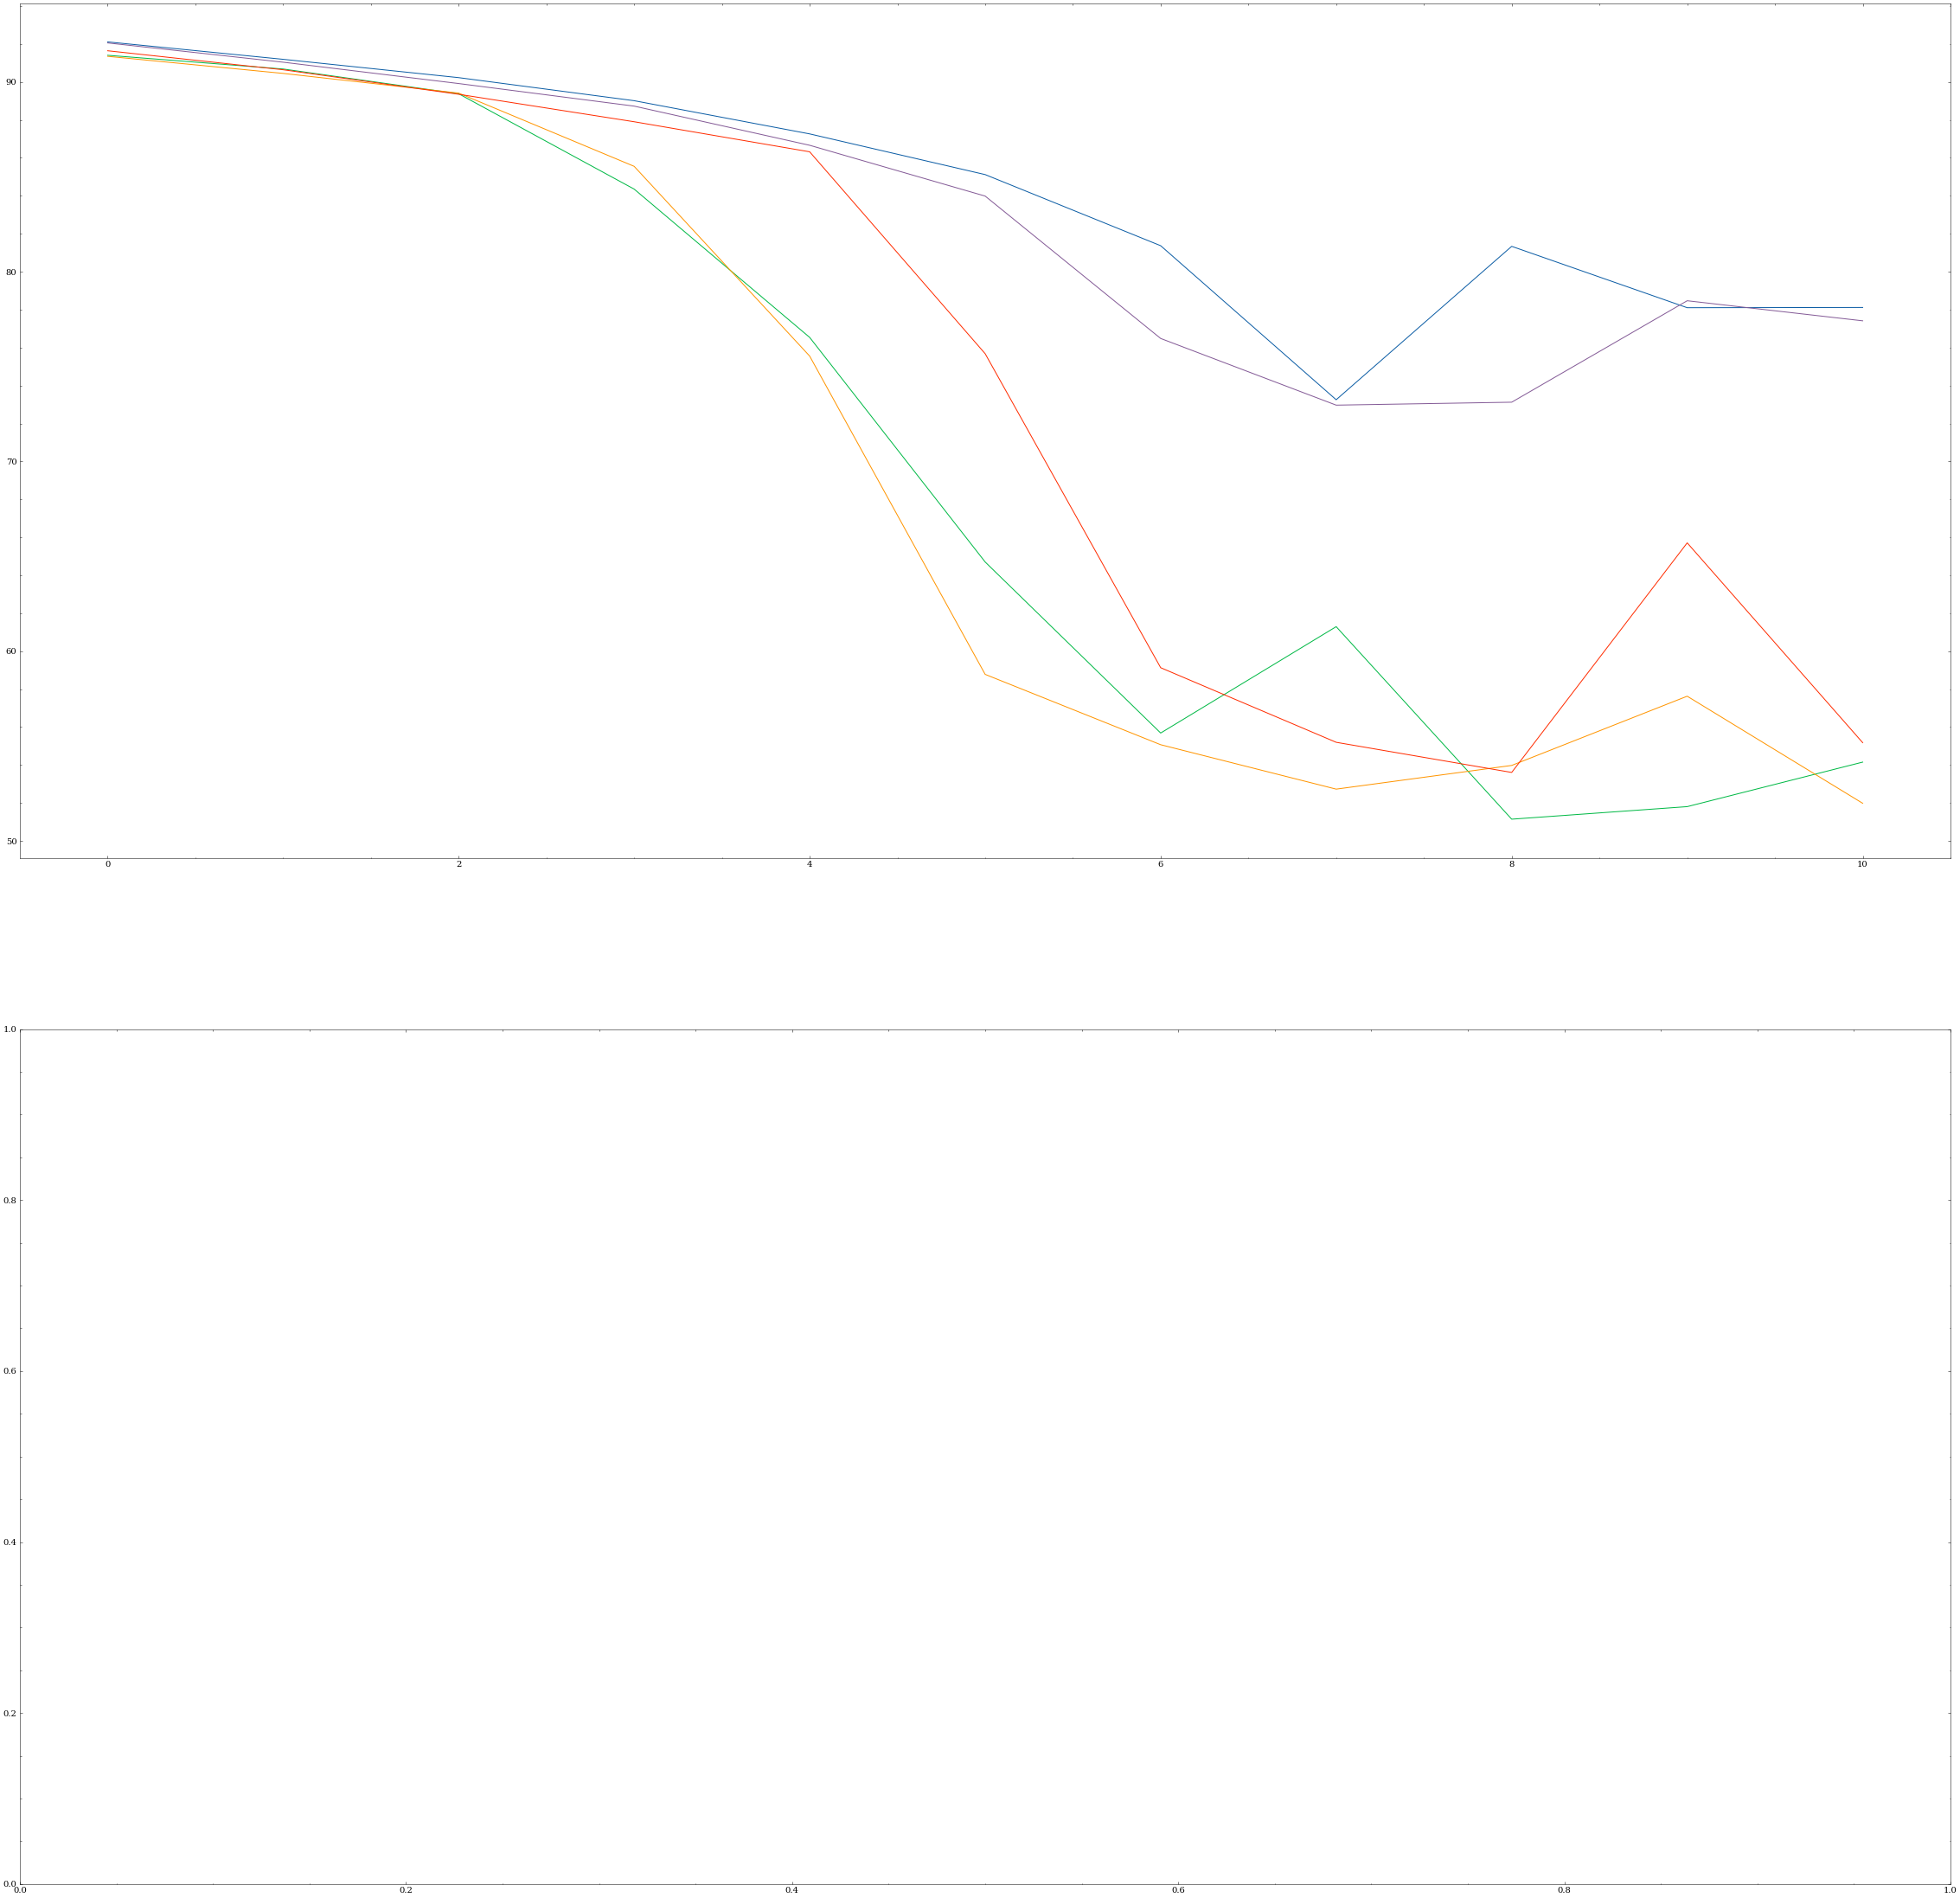

In [259]:
# 画图
# plt.style.use(['science', 'no-latex'])
x = range(len(data_mpc))
fig,ax = plt.subplots(2, 1, figsize=(40,40))
label = "speed_all"
ax[0].plot(x,data_mpc[label])
#plt.plot(x,data_static[3]["time_p"].values)
ax[0].plot(x,data_static[0][label])
ax[0].plot(x,data_static[1][label])
ax[0].plot(x,data_static[2][label])
ax[0].plot(x,data_feedback[label])

plt.subplot_tool()

plt.show()




TypeError: can only concatenate list (not "float") to list

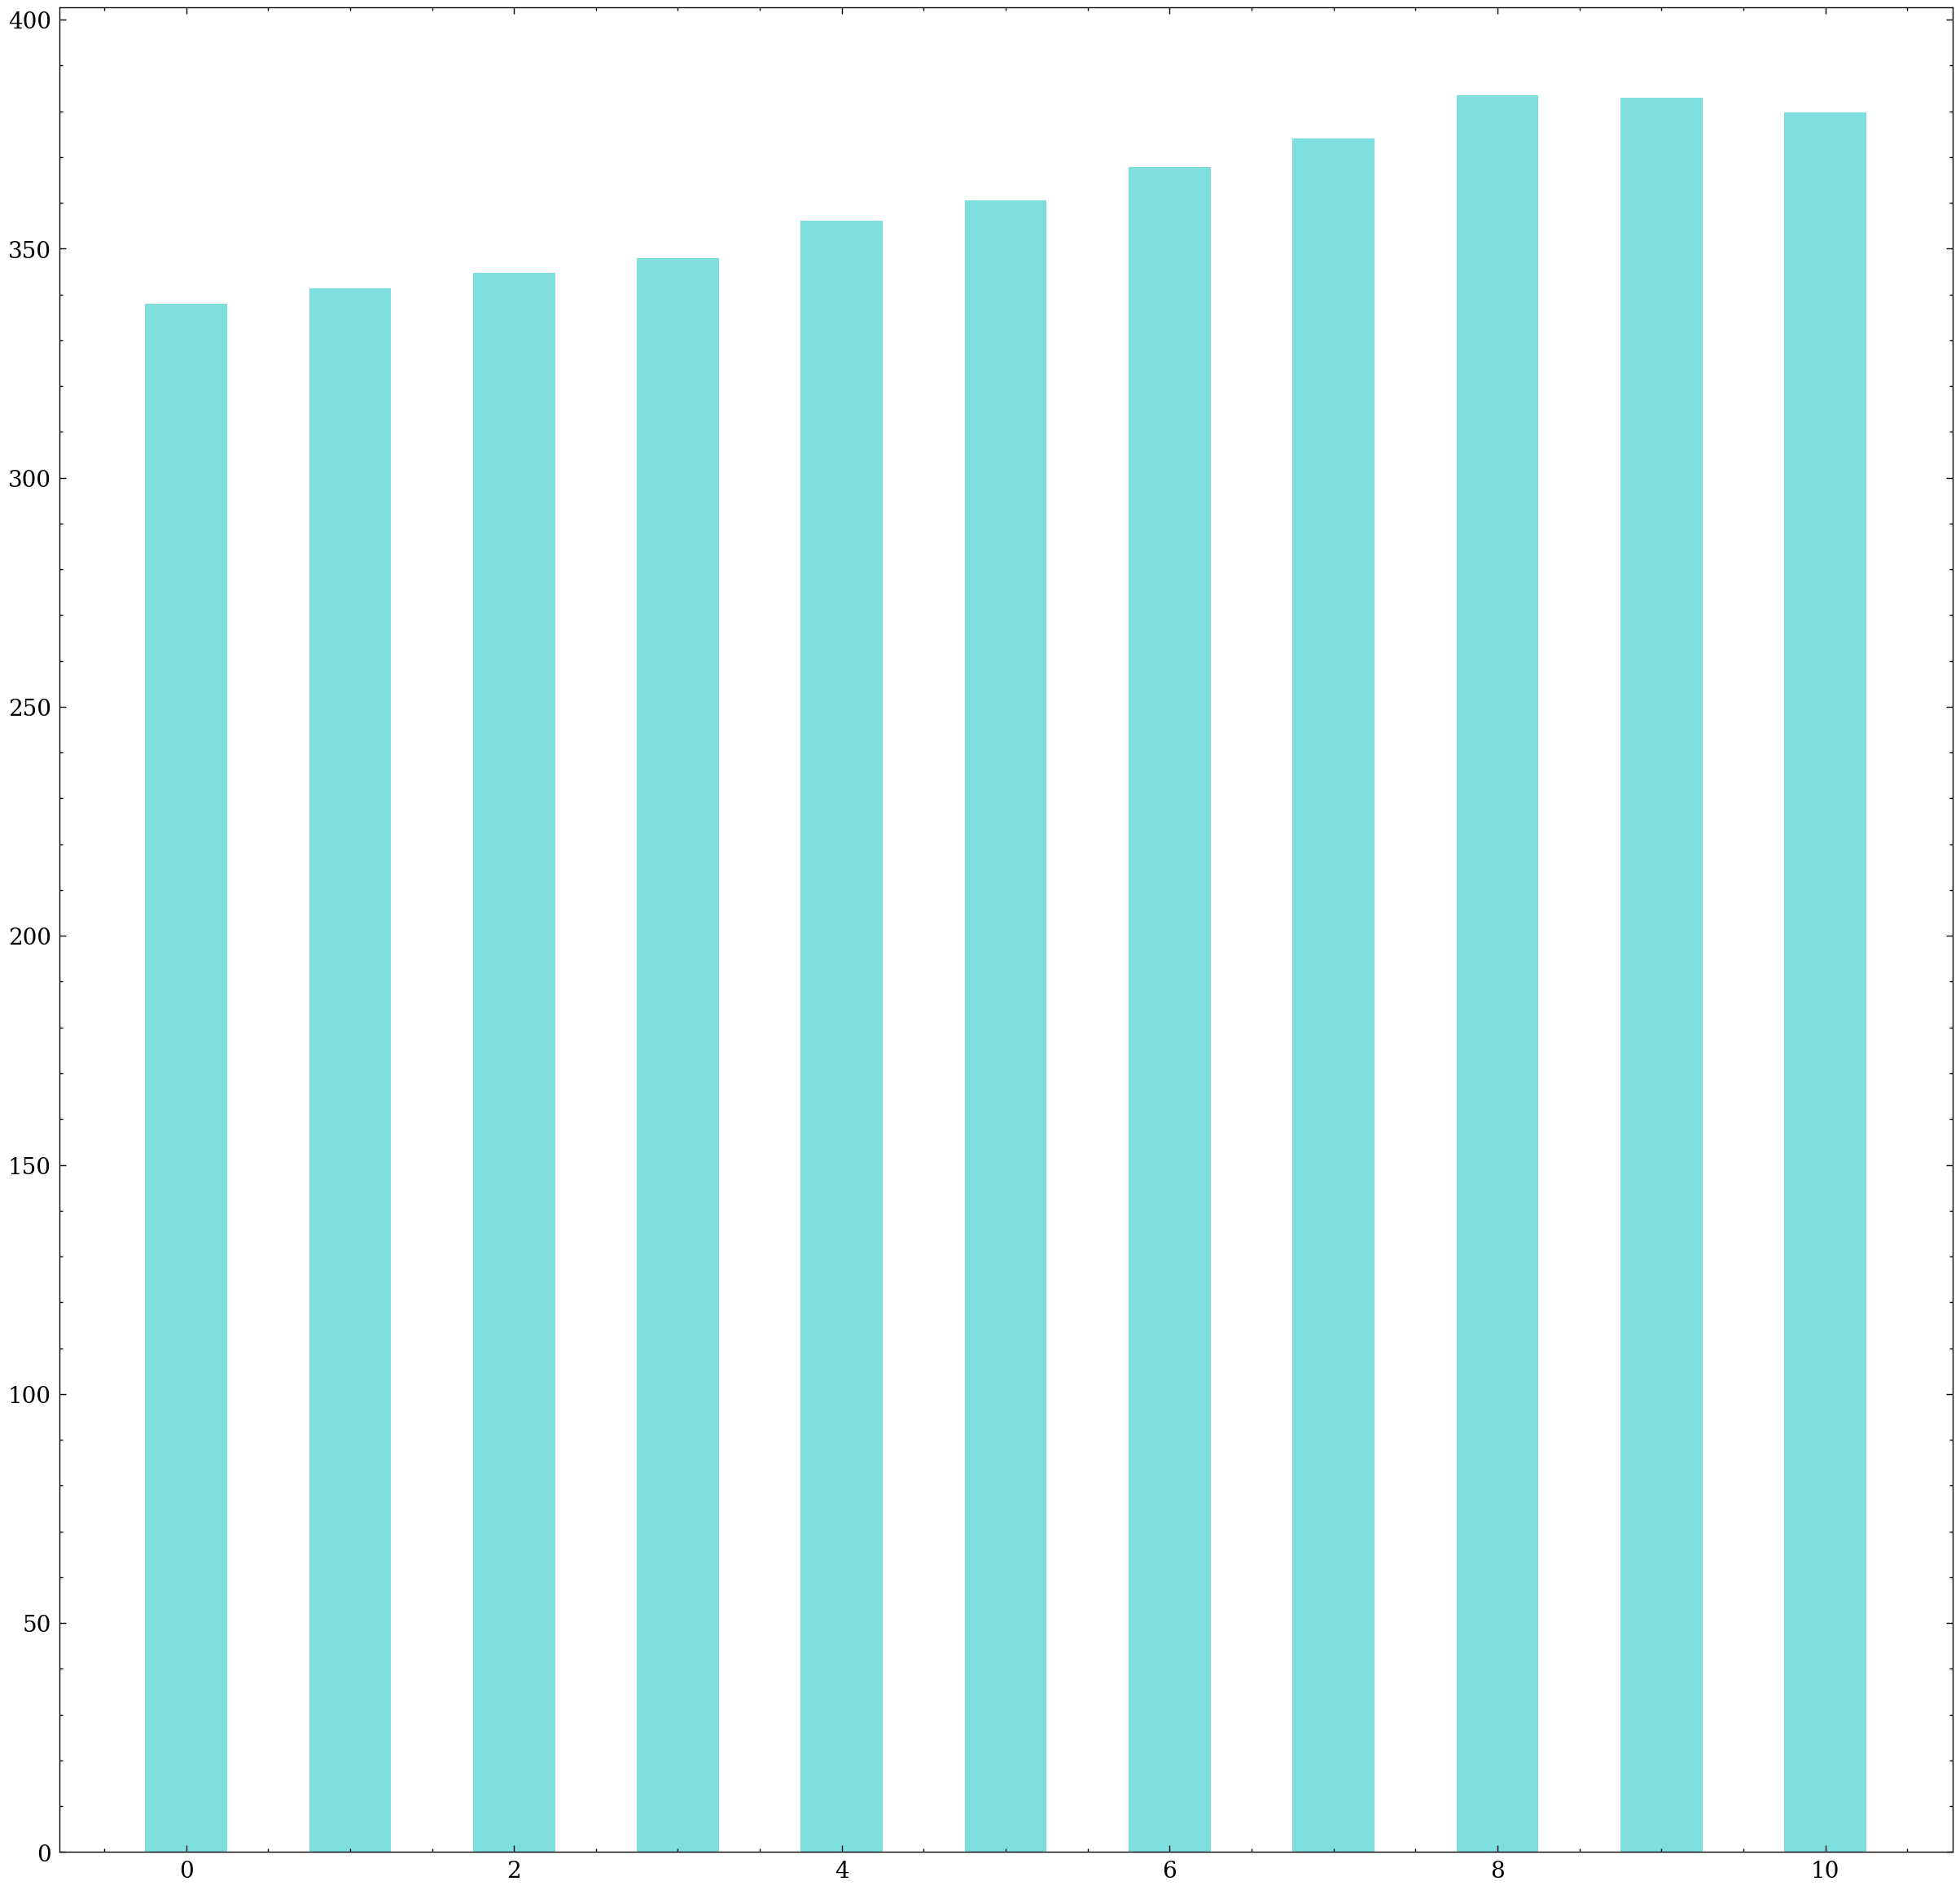

In [216]:

fig=plt.figure(figsize=(15, 15), dpi=200)
x = list(range(len(data_mpc)))

label = "traveltime_all"
#plt.plot(x,data_static[3]["time_p"].values)
bar_width = 0.5
plt.bar(x,data_mpc[label],bar_width,color="c",align="center",label="mpc",alpha=0.5)
plt.bar(x+bar_width,data_feedback[label],bar_width,color="b",align="center",label="feedback",alpha=0.5)


In [ ]:
list(range(len(data_mpc)))

In [ ]:
list(range(len(data_mpc)))